In [4]:
import qiskit
import numpy as np
import qtm.constant, qtm.nqubit
import importlib

importlib.reload(qtm.nqubit)

<module 'qtm.nqubit' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomography\\codes\\qtm\\nqubit.py'>

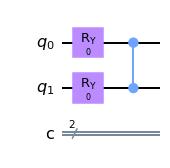

In [2]:
num_qubits = 2
thetas = np.zeros(2*num_qubits - 1)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_stargraph_state(qc, thetas)
qc.draw('mpl')

In [3]:
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho = qiskit.quantum_info.DensityMatrix(psi)
print(rho)

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


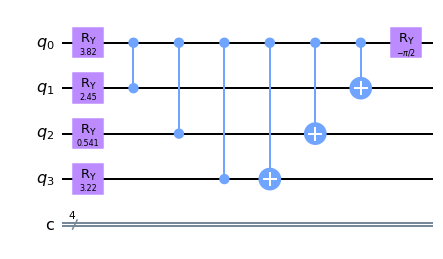

In [6]:
num_qubits = 4
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = 2*num_qubits - 1)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_GHZchecker_stargraph(qc, thetas, np.pi/2)
qc.draw('mpl')

In [9]:
# Init parameters
num_qubits = 4
num_layers = 2
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = int(3/2*num_qubits)*num_layers)
# For determine GHZ state

theta = np.pi/2

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_star2graph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.adam,
    verbose = 1,
    theta = theta,
    num_layers = num_layers
)


Step: 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]


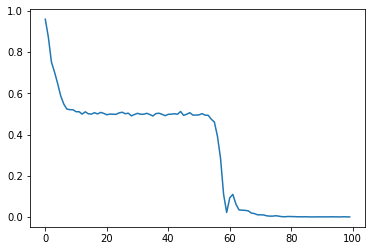

In [10]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

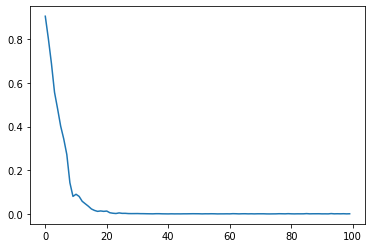

In [8]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

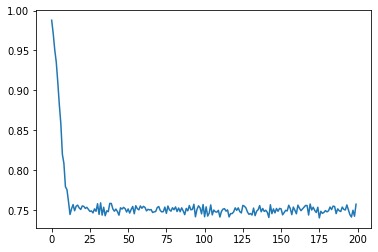

In [9]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [10]:
# Init parameters
num_qubits = 5
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits - 1)


qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_graph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    is_return_all_thetas = True
)


Step: 100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


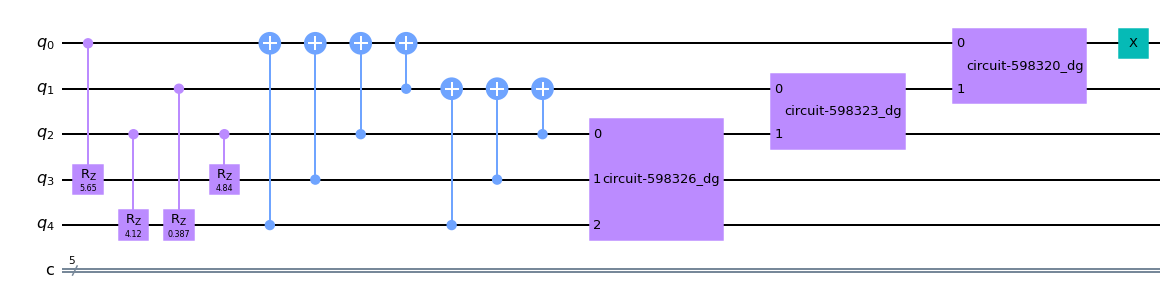

In [11]:
qc = qtm.nqubit.create_Wchecker_graph(qc, thetas)
qc.draw('mpl')

In [17]:
thetass[0:10]

[array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976]),
 array([5.65280055, 4.11510384, 0.38731127, 4.83968976])]

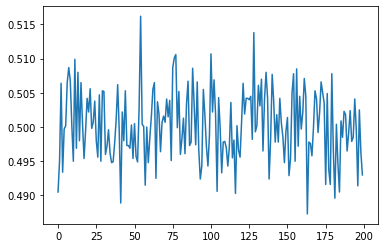

In [16]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [2]:
import qtm.encoding
# Init parameters
num_qubits = 3
# For arbitrary initial state

thetas = np.ones(num_qubits - 1)
# For determine random state
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_haarchecker_graph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    encoder = encoder
)


Step: 100%|██████████| 150/150 [03:49<00:00,  1.53s/it]


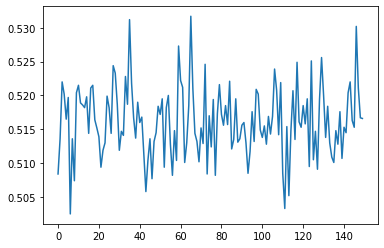

In [3]:
from matplotlib import pyplot as plt
plt.plot(loss_values)